## I. Write a basic implementation of Lloyd’s algorithm for a set of data in Rd (i.e., to find a Voronoi partition and a set of K centroids). Your algorithm should attempt to solve the classic K-means problem, for any user-selected positive integer value K.

* Assume the input data is given to you in a matrix X ∈ RN×d, where each row in X corresponds to an observation of a d-dimensional point. That is, your inputs will be a user-provided matrix **X** and the number of clusters K.
* Your outputs should be (i) a matrix Y ∈ RK×d, where row j contains the centroid of the jth partition; (ii) a cluster index vector C ∈ {1, 2, . . . K}
N , where C(i) = j indicates that the ith row of X (or the ith observation xi) belongs to cluster j; and (iii) the final objective function value, i.e., the best distortion, or averaged distance value, D obtained.
* Convergence may be based on a norm-based comparison of the iterates of Y , i.e., ∥Yp+1 −Yp∥ < tol, OR on a norm-based comparison of the distortion achieved ∥Dp+1 − Dp∥ < tol. Choose tolto be (1) 1 × 10−5, and (2) a different value of your choice, with your reasoning provided.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
shapeddata_df = pd.read_csv("/content/drive/MyDrive/IE529_comp2/ShapedData.csv", header=None, names=['x','y'])
clustering_df = pd.read_csv("/content/drive/MyDrive/IE529_comp2/clustering.csv", header=None, names=['x','y'])

## A Simple K-Means Lloyd’s algorithm to find K-Clusters based on user given value for K.

In [ ]:
# Simple Lloyd's algorithm
def lloydalgorithm(data_points, k, tolerance, maximum_iteration=10000):
  random_index = np.random.choice(data_points.shape[0], k, replace=False)
  k_centroids = data_points[random_index]
  for i in range(maximum_iteration):
    old_centroids = k_centroids
    diff = data_points - k_centroids.reshape(k_centroids.shape[0], 1, k_centroids.shape[1])
    dist = np.sqrt((diff**2).sum(axis=2))
    closest_pt = np.argmin(dist, axis=0)
    k_centroids = np.array([data_points[closest_pt==i].mean(axis=0) for i in range(k)])
    if np.all(np.abs(k_centroids - old_centroids)<tolerance):
        break
  best_distortion = 0
  for i, point_val in enumerate(k_centroids):
        cluster_points = data_points[closest_pt==i]
        best_distortion = best_distortion+np.sum((cluster_points-point_val)**2)
  return closest_pt, k_centroids,best_distortion

# Answer for Clustering_data for K=4 and for Tolerance Value : 1e-5
* (i) a matrix of centroids
* (ii) a cluster index vector
* (iii) the final objective function value, i.e., the best distortion

In [ ]:
labels, centroids, distortion = lloydalgorithm(np.array(clustering_df),4,1e-5)
print("(i) a matrix of centroids : \n",centroids)
print("\n(ii) a cluster index vector :\n", labels)
print("\nBest Distortion value: ",distortion/len(np.array(clustering_df)))

(i) a matrix of centroids : 
 [[-0.71452346  1.09363884]
 [-0.38431736 -1.32962279]
 [ 5.15607665  1.14446848]
 [ 2.59113455  0.4180984 ]]

(ii) a cluster index vector :
 [1 1 0 ... 2 2 2]

Best Distortion value:  1.9195714022666166


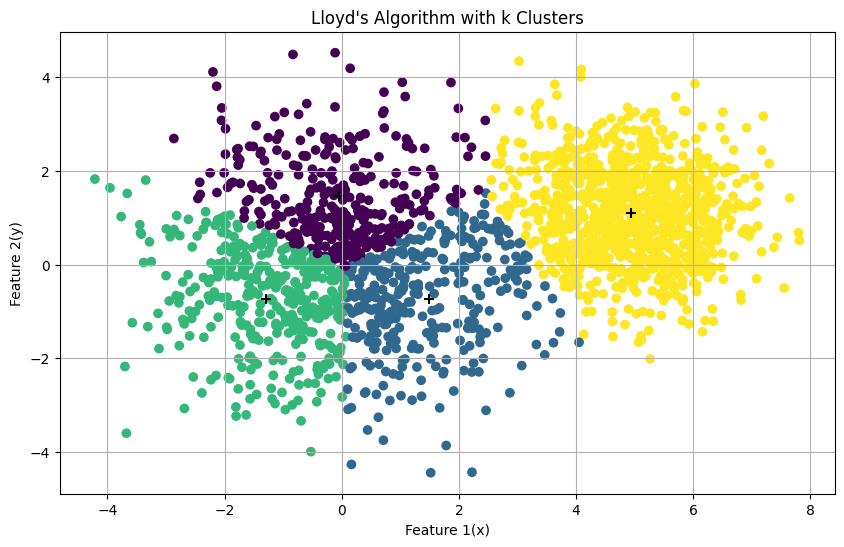

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(clustering_df)[:, 0], np.array(clustering_df)[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='black', marker='+', label='Centroids')
plt.title('Lloyd\'s Algorithm with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.legend()
plt.grid(True)
plt.show()

# Answer for shaped_data for K=4 and for Tolerance Value : 1e-5
* (i) a matrix of centroids
* (ii) a cluster index vector
* (iii) the final objective function value, i.e., the best distortion

In [ ]:
labels1, centroids1, distortion1 = lloydalgorithm(np.array(shapeddata_df),4,1e-5)
print("(i) a matrix of centroids : \n",centroids1)
print("\n(ii) a cluster index vector :\n", labels1)
print("\nBest Distortion value: ",distortion1/len(np.array(shapeddata_df)))

(i) a matrix of centroids : 
 [[ 0.55653223  0.60974602]
 [ 5.01273559 -0.45024028]
 [-0.38157179 -3.48083101]
 [ 2.44832837  4.33842488]]

(ii) a cluster index vector :
 [0 1 1 ... 1 1 2]

Best Distortion value:  3.2104353227947358


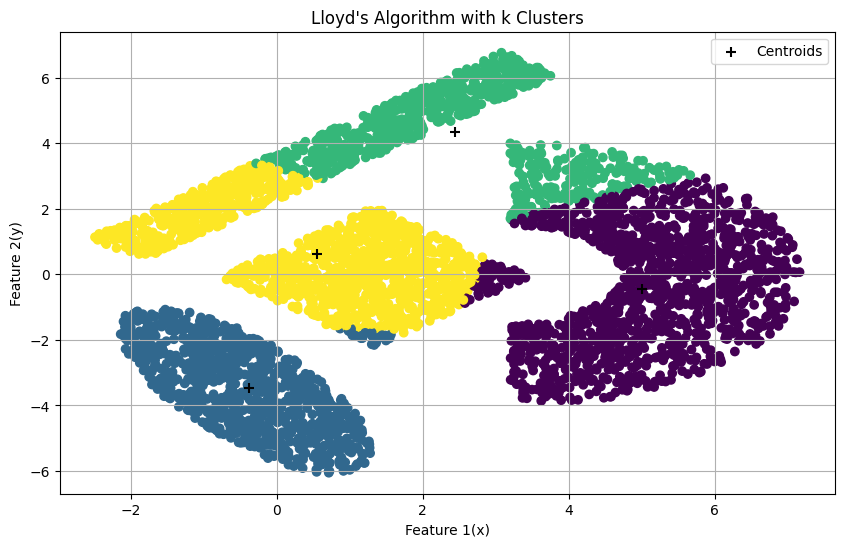

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(shapeddata_df)[:, 0], np.array(shapeddata_df)[:, 1], c=labels1, cmap='viridis', marker='o')
plt.scatter(centroids1[:, 0], centroids1[:, 1], s=50, c='black', marker='+', label='Centroids')
plt.title('Lloyd\'s Algorithm with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.legend()
plt.grid(True)
plt.show()

# For Tolerance Value : $1e^-1$

Justification: I have choosen the tolerance value as 1 because, I we can see signication changes in the data points assigning to randomly choosen first centroid. But when you decrease it even more than $1e^-5$ is usefull for higher dimensional data to converge more correclty, but in our dataset as the data is 2 dimension we cannot see significant change in points assigning to the cluster. But when we increase the tolerance value like close to one $1e^-1$ we get different points assigned to cluster centers.

 Answer for Clustering_data for K=4

In [ ]:
labels_tor, centroids_tor, distortion_tor = lloydalgorithm(np.array(clustering_df),4,1e-1)
print("(i) a matrix of centroids : \n",centroids_tor)
print("\n(ii) a cluster index vector :\n", labels_tor)
print("\nBest Distortion value: ",distortion_tor/len(np.array(clustering_df)))

(i) a matrix of centroids : 
 [[-0.63775674  0.8658443 ]
 [ 0.17726326 -1.3774639 ]
 [ 5.40778298  0.63506064]
 [ 3.8623159   1.58857539]]

(ii) a cluster index vector :
 [1 0 0 ... 2 2 3]

Best Distortion value:  1.9602495307997667


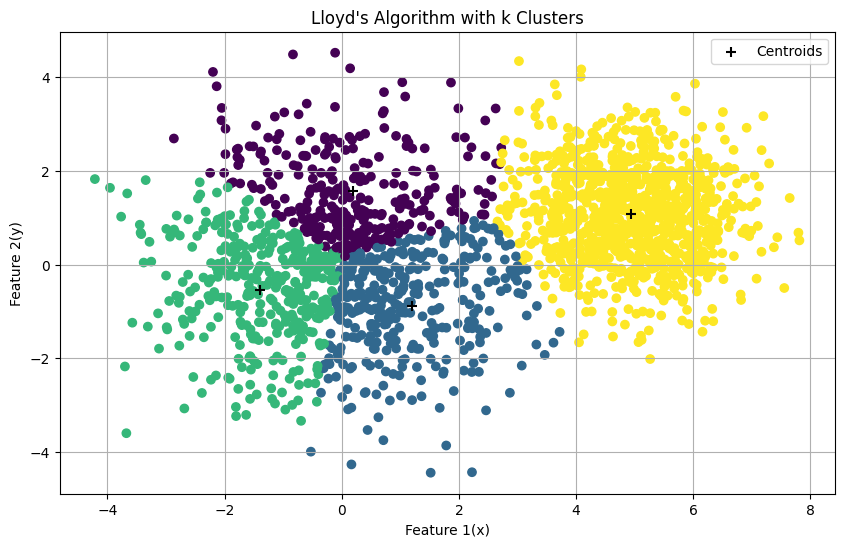

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(clustering_df)[:, 0], np.array(clustering_df)[:, 1], c=labels_tor, cmap='viridis', marker='o')
plt.scatter(centroids_tor[:, 0], centroids_tor[:, 1], s=50, c='black', marker='+', label='Centroids')
plt.title('Lloyd\'s Algorithm with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.legend()
plt.grid(True)
plt.show()

Answer for shaped_data for K=4

In [ ]:
labels1_tor, centroids1_tor, distortion1_tor = lloydalgorithm(np.array(shapeddata_df),4,1)
print("(i) a matrix of centroids : \n",centroids1_tor)
print("\n(ii) a cluster index vector :\n", labels1_tor)
print("\nBest Distortion value: ",distortion1_tor/len(np.array(shapeddata_df)))

(i) a matrix of centroids : 
 [[ 4.68286142  1.85975386]
 [ 0.13662615 -1.43134596]
 [ 1.53245563  4.44220733]
 [ 4.9505447  -1.37696068]]

(ii) a cluster index vector :
 [1 3 3 ... 0 0 1]

Best Distortion value:  4.39944855636666


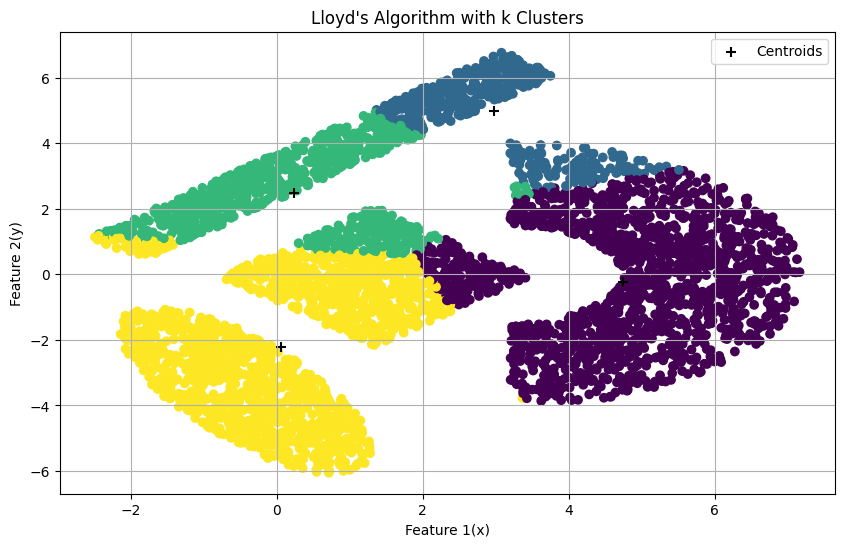

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(shapeddata_df)[:, 0], np.array(shapeddata_df)[:, 1], c=labels1_tor, cmap='viridis', marker='o')
plt.scatter(centroids1_tor[:, 0], centroids1_tor[:, 1], s=50, c='black', marker='+', label='Centroids')
plt.title('Lloyd\'s Algorithm with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.grid(True)
plt.legend()
plt.show()

## Greedy K-Centers Algorithm Implementation

Write a basic implementation of the "Greedy K-Centers" algorithm, as described in the reading by S. Har-Peled and discussed in class. Your algorithm should aim to solve the classic K-centers problem for any user-selected positive integer value K. The underlying distance function used in your algorithm should be the Euclidean distance, and your objective should be to minimize the maximum distance between any observation $x_i \in X $ and its closest center $(c_j) \in Q $. That is, to find Q giving:

$min_{Q \subseteq X, |Q| = K} \left( \max_{x_i \in X} \left(\min_{c_j \in Q} \|x_i - c_j\|_2 \right) \right)$

### Assumptions
- The input data is given as a matrix $ X \in \mathbb{R}^{N \times d} $.
- A positive integer \( K \).

### Output
- Your output should be a matrix $ Q \in \mathbb{R}^{K \times d} $ containing the final \( K \) d-dimensional centers.
- The objective function value, i.e., the final $ \max_{x_i \in X} (\min_{c_j \in Q} \|x_i - c_j\|_2) $ obtained.


K-Greedy Algorithm is as follows:

In [ ]:
def greedykalgo1(data_points, k):
  first_index = np.random.choice(data_points.shape[0], 1, replace=False)
  #print(first_index)
  k_centers = data_points[first_index]
  current_cent = data_points[first_index]
  #print(current_cent)
  #print(data_points.shape)
  #data_points = np.delete(data_points, first_index,axis=0)
  #print(data_points.shape)
  #print(k_centers)
  for i in range(1,k):
    diff = data_points - current_cent
    dist = np.sqrt((diff**2).sum(axis=1))
    max_dist = np.max(dist)
    center_index = np.argmax(dist)
    #print(center_index," \n")
    k_centers=np.append(k_centers, [data_points[center_index]], axis=0)
    current_cent = data_points[[center_index]]
    # data_points = np.delete(data_points, center_index,axis=0)
  return k_centers, max_dist #,data_points

For Clustered_data with k=3:

In [ ]:
cent_k, max_disttt = greedykalgo1(np.array(clustering_df),3)
print("K_centers :\n",cent_k)
print("\nBest Maximum Distance:",max_disttt)

K_centers :
 [[ 3.8644  1.4426]
 [-3.6773 -3.5965]
 [ 7.1976  3.1657]]

Best Maximum Distance: 12.80588922527444


In [ ]:
def labelscal(data_points, centers):
    diff1 = data_points - centers.reshape(centers.shape[0], 1, centers.shape[1])
    dist1 = np.sqrt((diff1**2).sum(axis=2))
    closest_pt2 = np.argmin(dist1, axis=0)
    return closest_pt2

close_points_gk3 = labelscal(np.array(clustering_df),cent_k)
print("Assigned Cluster Labels:\n", close_points_gk3)

Assigned Cluster Labels:
 [0 1 1 ... 2 0 0]


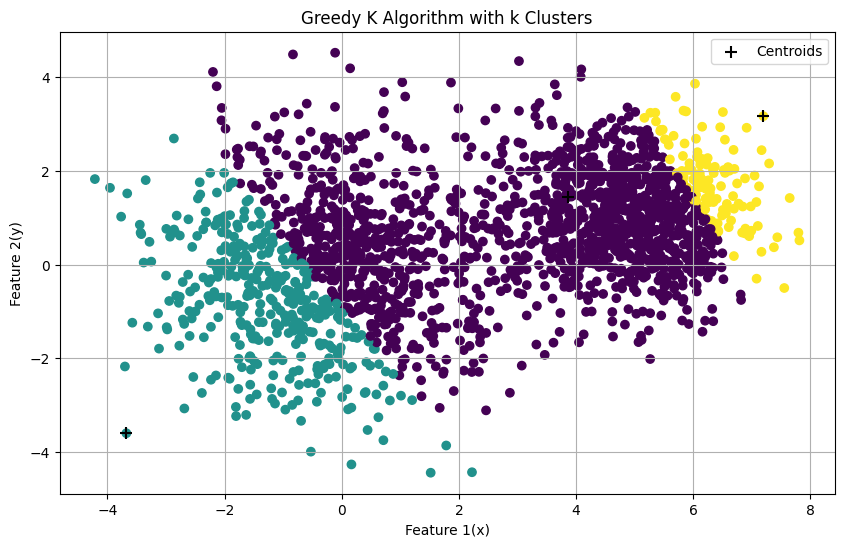

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(clustering_df)[:, 0], np.array(clustering_df)[:, 1], c=close_points_gk3, cmap='viridis', marker='o')
plt.scatter(cent_k[:, 0], cent_k[:, 1], s=70, c='black', marker='+', label='Centroids')
plt.title('Greedy K Algorithm with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.legend()
plt.grid(True)
plt.show()

For Shaped_data with k=3:

In [ ]:
cent_k1, max_disttt1 = greedykalgo1(np.array(shapeddata_df),3)
print("K_centers :\n",cent_k1)
print("\nBest Maximum Distance:",max_disttt1)

K_centers :
 [[ 5.0651   0.74469]
 [-0.11754 -5.6056 ]
 [ 3.0811   6.7565 ]]

Best Maximum Distance: 12.769213533323029


In [ ]:
close_points_gk2 = labelscal(np.array(shapeddata_df),cent_k1)
print("Assigned Cluster Labels:\n", close_points_gk2)

Assigned Cluster Labels:
 [0 0 0 ... 0 0 1]


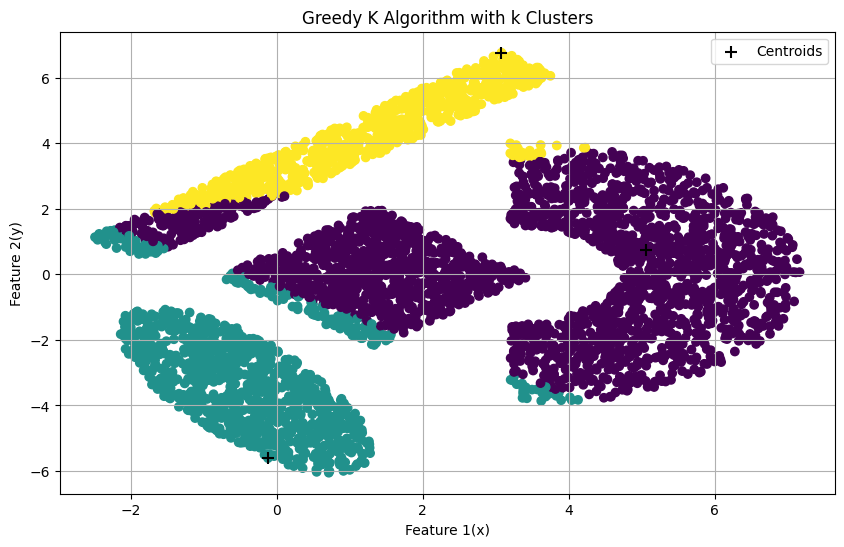

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(shapeddata_df)[:, 0], np.array(shapeddata_df)[:, 1], c=close_points_gk2, cmap='viridis', marker='o')
plt.scatter(cent_k1[:, 0], cent_k1[:, 1], s=70, c='black', marker='+', label='Centroids')
plt.title('Greedy K Algorithm with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.legend()
plt.grid(True)
plt.show()

# II.2 - Extra Credit:
Write a basic implementation of the single-swap heuristic for which you try to improve the solution to the K-centers problem in II.1 by a implementing a series of ”swaps”. If Q is your current set of centers, and you make a single swap, giving Qnew = Q − {cj} ∪ {o}, then you should replace Q with Qnew whenever the new objective value, that is the computed value for (1), is reduced by a factor of (1 − τ ). When there is no swap that improves the solution by this factor, the local search stops. Let τ = 0.05.


In [ ]:
def singleswapheuristic(data_points, k_centers,max_dist, tau=0.05):
    condition = True
    while condition:
        condition = False
        for i, center in enumerate(k_centers):
            for point in data_points:
                new_centers = np.copy(k_centers)
                new_centers[i] = point
                new_dist = np.max(np.min(np.linalg.norm(data_points[:, np.newaxis] - new_centers, axis=2), axis=1))
                if new_dist < max_dist * (1 - tau):
                    print("Replacing center",i,"with point:",point)
                    print("New max distance:",new_dist)
                    k_centers = new_centers
                    max_dist = new_dist
                    condition = True
                    break
            if condition:
                break
        if not condition:
            print("No improvement stopped")
    return k_centers, max_dist

# Now applying single swap heuristic to the above found centers using K-Greedy method for both the datasets to minimize the best maximum distance.

For Clustered_data with k=5:

In [ ]:
cent_k_sw, max_disttt_sw = singleswapheuristic(np.array(clustering_df),cent_k,max_disttt)
print("New K_centers :\n",cent_k_sw)
print("\nOld Best Maximum Distance:",max_disttt)
print("\nNew Best Maximum Distance:",max_disttt_sw)

Replacing center 0 with point: [ 0.17978 -1.0343 ]
New max distance: 5.66644903977791
Replacing center 0 with point: [ 0.35374 -0.25962]
New max distance: 5.215113826753928
No improvement found, stopping.
New K_centers :
 [[ 0.35374 -0.25962]
 [-3.6773  -3.5965 ]
 [ 7.1976   3.1657 ]
 [-3.6773  -3.5965 ]
 [ 7.1976   3.1657 ]]

Old Best Maximum Distance: 12.80588922527444

New Best Maximum Distance: 5.215113826753928


For Shaped_data with k=5:

In [ ]:
cent_k1_sw, max_disttt1_sw = singleswapheuristic(np.array(shapeddata_df),cent_k1,max_disttt1)
print("New K_centers :\n",cent_k1_sw)
print("\nOld Best Maximum Dsitance:",max_disttt1)
print("\nNew Best Maximum Distance:",max_disttt1_sw)

Replacing center 0 with point: [ 2.1865 -1.226 ]
New max distance: 5.540909708703076
Replacing center 0 with point: [2.1782 0.3403]
New max distance: 5.073655323334449
No improvement found, stopping.
New K_centers :
 [[ 2.1782   0.3403 ]
 [ 3.0811   6.7565 ]
 [ 0.54923 -6.0252 ]
 [ 3.0811   6.7565 ]
 [ 0.54923 -6.0252 ]]

Old Best Maximum Dsitance: 13.030050674763318

New Best Maximum Distance: 5.073655323334449


### III. Spectral Clustering Algorithm Implementation

Write an implementation of the Spectral Clustering algorithm, using either basic unnormalized clustering or normalized clustering (refer to the reading by Luxborg for details). Assume you are given a matrix of data $( X \in \mathbb{R}^{N \times d})$, and you would like to identify some user-selected number of clusters, \( K \). Your outputs should be:

- A **weighted adjacency matrix, \( W \)**, using the Gaussian similarity function based on the Euclidean distance (with parameter value $( sigma )$ of your choice but clearly stated) and a \( k \)-nearest neighborhood structure (where \( k \) is also your choice and clearly stated);
- A **matrix \( U \)** containing the first \( K \) eigenvectors of the Laplacian \( L \) (or generalized eigenvectors for the normalized case);
- A **cluster index vector $ C \in \{1, 2, \ldots, K\}^N$**, where $ C(i) = j$ indicates that the $i-th$ row of U belongs to cluster j.


This is to find the similarity matrix for the spectral clustering using K-nearest neighborhood structure. The similarity function I am using here is gaussian similarity function,as to find the similarity between two points we can use any of the function like euclidean distance, manhatten etc...

In [ ]:
#similarty mat knn
def similarity_mat_knn(data_points, k,sigma=0.5):
  neighbour = NearestNeighbors(n_neighbors=k+1)
  neighbour.fit(data_points)
  distances, indices = neighbour.kneighbors(data_points)
  #print(indices)
  s_mat = np.zeros((len(data_points),len(data_points)))
  for i in range(len(data_points)):
    for j in range(len(data_points)):
      if j in indices[i]:
        temp_dist = np.sum((data_points[i]-data_points[j])**2)
        s_mat[i,j]=np.exp(-temp_dist/(2*sigma**2))
  return s_mat

This is to find the similarity matrix for the spectral clustering using the fully connected graph. The similarity function I am using here is gaussian similarity function: $s(x_i, x_j) =exp(−||x_i − xj||^2 /(2σ^2))$. <br><br>
*Choice of sigma value:*<br>
Also the σ value i have choosen is 0.5 for the Gaussian similarity function helps the algorithm pay close attention to smaller distances between data points. This  is great for datasets with uniformly scaled features, as it quickly distinguishes between points based on subtle differences. It's especially useful when you're dealing with data where small variations are significant and you want the algorithm to capture these.

In [ ]:
#similarity matrix
def similarity_mat(data_points,sigma=0.5):
  s_mat = np.zeros((len(data_points),len(data_points)))
  for i in range(len(data_points)):
    for j in range(len(data_points)):
      temp_dist = np.sum((data_points[i]-data_points[j])**2)
      s_mat[i,j]=np.exp(-temp_dist/(2*sigma**2))
  return s_mat

In [ ]:
#DMatrix
def d_mat(matrix_d):
  d_mat = np.zeros((matrix_d.shape[0],matrix_d.shape[1]))
  for i in range(matrix_d.shape[0]):
    d_mat[i,i]=np.sum(matrix_d[i])
  return d_mat

Algorithm for Spectral Clustering:

In [ ]:
#spectral clustering algorithm
def spectral_cluster(data_points,k,algo,KnnK):
  if algo==1:
    simi_mat = similarity_mat(data_points)
  elif algo==0:
    simi_mat = similarity_mat_knn(data_points,KnnK)
  #print(simi_mat,'\n')
  D_matrix = d_mat(simi_mat)
  #print(D_matrix,'\n')
  Lap_matrix = D_matrix-simi_mat
  #print(Lap_matrix,'\n')
  eigen_val, eigen_vec = np.linalg.eig(Lap_matrix)
  sorted_eigenvalues = eigen_val[np.argsort(eigen_val)]
  sorted_eigenvectors = eigen_vec[:, np.argsort(eigen_val)]
  eigenvec_topk = sorted_eigenvectors[:, :k]
  #print(eigenvec_topk,'--> eigenvec')
  c_pt, k_cen,best_dis = lloydalgorithm(eigenvec_topk,k,1e-5)
  return c_pt, k_cen,best_dis,simi_mat, eigenvec_topk

# For Cluster_data with K=4 and using Gaussian similarity function based on the Euclidean distance



In [ ]:
lab, k_cen, best_dis, adj_mat, eigen_vec= spectral_cluster(np.array(clustering_df),4,1)

In [ ]:
print("Weighted adjacency matrix, W:\n",adj_mat)
print("\nFirst K eigenvectors of the Laplacian L:\n",eigen_vec)
print("\nCluster index vector C:\n",lab)

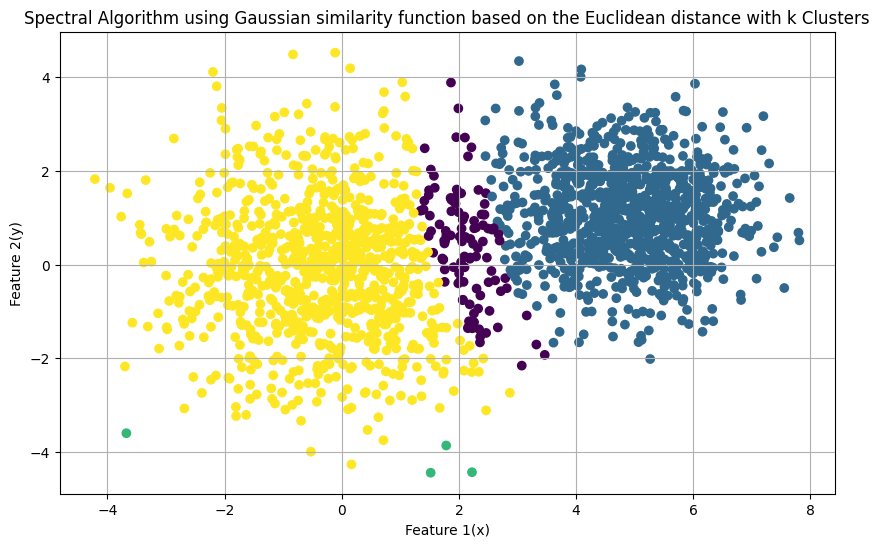

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(clustering_df)[:, 0], np.array(clustering_df)[:, 1], c=lab, cmap='viridis', marker='o')
plt.title('Spectral Algorithm using Gaussian similarity function based on the Euclidean distance with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.grid(True)
plt.show()

For Cluster_data with K=5 and using K-Nearest Neighborhood Structure with 5-neighbors

In [ ]:
lab_knn, k_cen_knn, best_dis_knn, adj_mat_knn, eigen_vec_knn= spectral_cluster(np.array(clustering_df),4,0,5)

In [ ]:
print("Weighted adjacency matrix, W:\n",adj_mat_knn)
print("\nFirst K eigenvectors of the Laplacian L:\n",eigen_vec_knn)
print("\nCluster index vector C:\n",lab_knn)

Weighted adjacency matrix, W:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

First K eigenvectors of the Laplacian L:
 [[-2.38464995e-03+0.j  3.18372007e-02+0.j  2.22559083e-02+0.j
  -1.33816214e-02+0.j]
 [-2.80346225e-03+0.j  3.33433330e-02+0.j  1.94807409e-02+0.j
  -1.34048623e-02+0.j]
 [-2.86643851e-03+0.j  3.35091629e-02+0.j  1.90869616e-02+0.j
  -1.34271152e-02+0.j]
 ...
 [ 1.41968218e-03+0.j -1.44003946e-05+0.j -4.02386259e-05+0.j
   4.19667827e-03+0.j]
 [-9.20972196e-03+0.j  9.82689772e-05+0.j  2.63334490e-04+0.j
  -3.08001510e-02+0.j]
 [-9.06592872e-03+0.j  2.18485398e-03+0.j  1.24917378e-03+0.j
  -2.97165702e-02+0.j]]

Cluster index vector C:
 [1 1 1 ... 2 2 2]


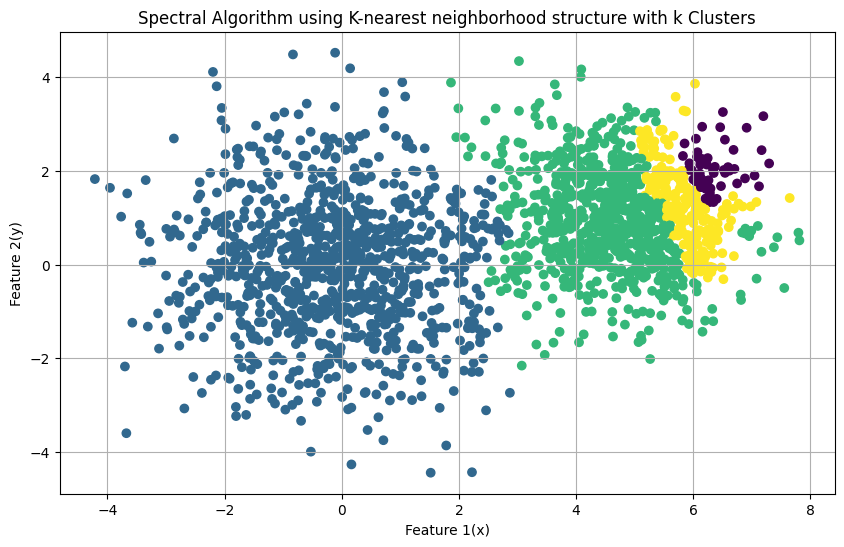

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(clustering_df)[:, 0], np.array(clustering_df)[:, 1], c=lab_knn, cmap='viridis', marker='o')
plt.title('Spectral Algorithm using K-nearest neighborhood structure with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.grid(True)
plt.show()

Now, increasing the Neighbors to a high value like 50 to see how it affects the cluster assignment.

In [ ]:
lab_knn, k_cen_knn, best_dis_knn, adj_mat_knn, eigen_vec_knn= spectral_cluster(np.array(clustering_df),4,0,50)

In [ ]:
print("Weighted adjacency matrix, W:\n",adj_mat_knn)
print("\nFirst K eigenvectors of the Laplacian L:\n",eigen_vec_knn)
print("\nCluster index vector C:\n",lab_knn)

Weighted adjacency matrix, W:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

First K eigenvectors of the Laplacian L:
 [[ 2.23606798e-02+0.j  3.24322726e-02+0.j -2.65960103e-04+0.j
  -1.90754227e-04+0.j]
 [ 2.23606798e-02+0.j  3.32451603e-02+0.j -2.71462122e-04+0.j
  -4.25591479e-04+0.j]
 [ 2.23606798e-02+0.j  3.36656778e-02+0.j -2.58897879e-04+0.j
  -4.85043999e-04+0.j]
 ...
 [ 2.23606798e-02+0.j -8.43551388e-03+0.j  2.68875855e-05+0.j
   8.77911414e-06+0.j]
 [ 2.23606798e-02+0.j -7.77291333e-03+0.j  2.10479886e-05+0.j
   4.52676841e-06+0.j]
 [ 2.23606798e-02+0.j -7.07131504e-03+0.j  1.44666418e-05+0.j
  -1.22011454e-05+0.j]]

Cluster index vector C:
 [2 2 2 ... 0 0 0]


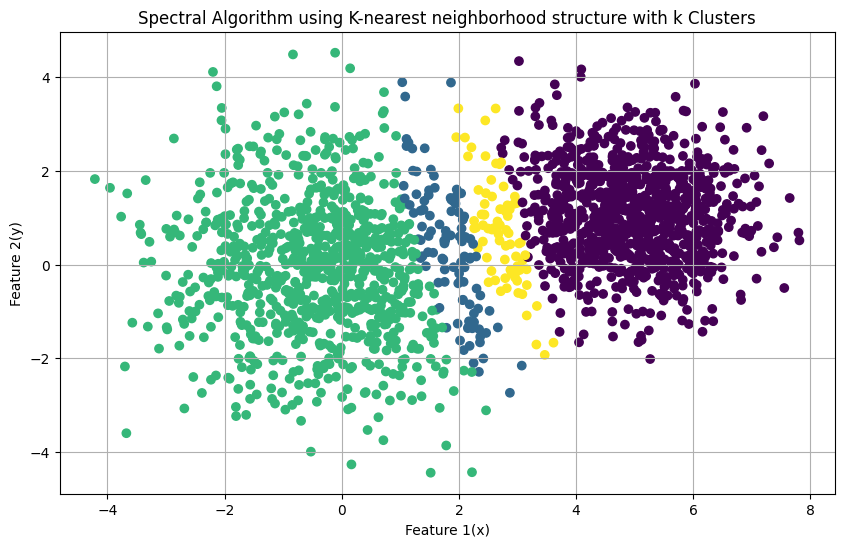

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(clustering_df)[:, 0], np.array(clustering_df)[:, 1], c=lab_knn, cmap='viridis', marker='o')
plt.title('Spectral Algorithm using K-nearest neighborhood structure with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.grid(True)
plt.show()

On increasing the cluster to 10

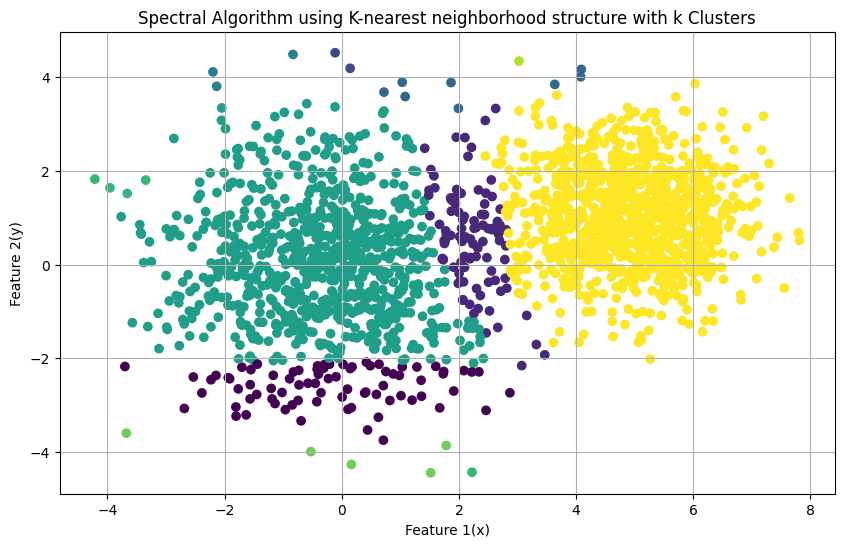

In [ ]:
lab_knn, k_cen_knn, best_dis_knn, adj_mat_knn, eigen_vec_knn= spectral_cluster(np.array(clustering_df),10,0,50)
plt.figure(figsize=(10, 6))
plt.scatter(np.array(clustering_df)[:, 0], np.array(clustering_df)[:, 1], c=lab_knn, cmap='viridis', marker='o')
plt.title('Spectral Algorithm using K-nearest neighborhood structure with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.grid(True)
plt.show()

Inference: <br>
On Incresing the K Neighbors we can see that the points are properly clustered for small cluster value. But when we increase the cluster to big number, the algorithm clusters the points that are together and the points that are away from other points are termed as cluster like the outliers.

# For Shaped_data with K=4 and using Gaussian similarity function based on the Euclidean distance

In [ ]:
lab, k_cen, best_dis, adj_mat, eigen_vec= spectral_cluster(np.array(shapeddata_df),4,1,5)

In [ ]:
print("Weighted adjacency matrix, W:\n",adj_mat)
print("\nFirst K eigenvectors of the Laplacian L:\n",eigen_vec)
print("\nCluster index vector C:\n",lab)

Weighted adjacency matrix, W:
 [[1.00000000e+00 4.73687664e-14 2.07851841e-09 ... 4.03066783e-12
  1.48473127e-10 1.45202585e-14]
 [4.73687664e-14 1.00000000e+00 8.71625930e-02 ... 2.31019713e-20
  1.47752191e-12 1.62468990e-40]
 [2.07851841e-09 8.71625930e-02 1.00000000e+00 ... 3.08011401e-21
  5.43532579e-14 9.36800139e-29]
 ...
 [4.03066783e-12 2.31019713e-20 3.08011401e-21 ... 1.00000000e+00
  8.60765846e-02 4.00475922e-50]
 [1.48473127e-10 1.47752191e-12 5.43532579e-14 ... 8.60765846e-02
  1.00000000e+00 1.05391607e-47]
 [1.45202585e-14 1.62468990e-40 9.36800139e-29 ... 4.00475922e-50
  1.05391607e-47 1.00000000e+00]]

First K eigenvectors of the Laplacian L:
 [[ 0.01497382  0.00373618 -0.00160634 -0.02727424]
 [ 0.01497382 -0.02004319 -0.00516267  0.00530727]
 [ 0.01497382 -0.01980118 -0.00516206  0.0048702 ]
 ...
 [ 0.01497382 -0.01934951 -0.00447886  0.00534158]
 [ 0.01497382 -0.01979278 -0.00475781  0.00563067]
 [ 0.01497382  0.0191458  -0.01803346  0.0124139 ]]

Cluster index

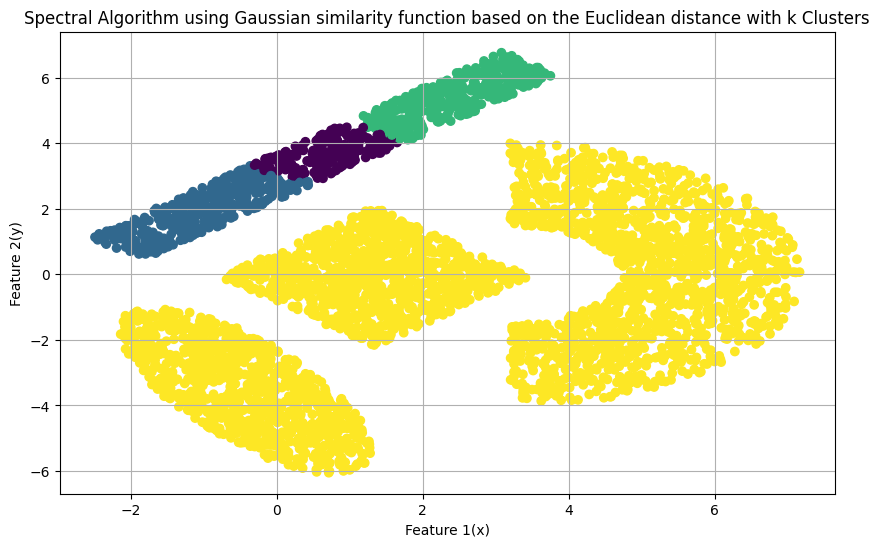

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(shapeddata_df)[:, 0], np.array(shapeddata_df)[:, 1], c=lab, cmap='viridis', marker='o')
plt.title('Spectral Algorithm using Gaussian similarity function based on the Euclidean distance with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.grid(True)
plt.show()

#For shaped_data with K=5 and using K-Nearest Neighborhood Structure with 5-neighbors

In [ ]:
lab_knn, k_cen_knn, best_dis_knn, adj_mat_knn, eigen_vec_knn= spectral_cluster(np.array(shapeddata_df),4,0,5)

In [ ]:
print("Weighted adjacency matrix, W:\n",adj_mat_knn)
print("\nFirst K eigenvectors of the Laplacian L:\n",eigen_vec_knn)
print("\nCluster index vector C:\n",lab_knn)

Weighted adjacency matrix, W:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

First K eigenvectors of the Laplacian L:
 [[-0.03050554+0.j  0.02422231+0.j -0.00822121+0.j  0.00121769+0.j]
 [-0.00104339+0.j  0.02121167+0.j -0.01873834+0.j  0.00162827+0.j]
 [-0.00479263+0.j  0.00408961+0.j -0.02510419+0.j  0.00158559+0.j]
 ...
 [ 0.00635654+0.j -0.01189481+0.j  0.00193548+0.j  0.0551232 +0.j]
 [-0.00164286+0.j -0.00924611+0.j -0.01639604+0.j  0.02375206+0.j]
 [-0.0025458 +0.j  0.00138333+0.j -0.00138751+0.j -0.00075077+0.j]]

Cluster index vector C:
 [1 0 2 ... 3 3 0]


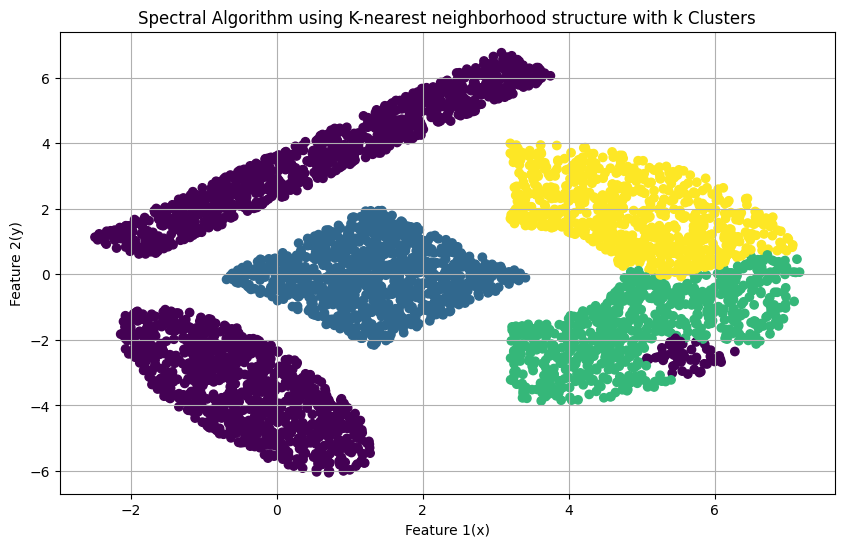

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(shapeddata_df)[:, 0], np.array(shapeddata_df)[:, 1], c=lab_knn, cmap='viridis', marker='o')
plt.title('Spectral Algorithm using K-nearest neighborhood structure with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.grid(True)
plt.show()

Now, increasing the Neighbors to a high value like 50 to see how it affects the cluster assignment.

In [ ]:
lab_knn, k_cen_knn, best_dis_knn, adj_mat_knn, eigen_vec_knn= spectral_cluster(np.array(shapeddata_df),4,0,50)

In [ ]:
print("Weighted adjacency matrix, W:\n",adj_mat_knn)
print("\nFirst K eigenvectors of the Laplacian L:\n",eigen_vec_knn)
print("\nCluster index vector C:\n",lab_knn)

Weighted adjacency matrix, W:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

First K eigenvectors of the Laplacian L:
 [[ 3.72308498e-03+0.j  8.88839745e-03+0.j -3.16227766e-02+0.j
  -3.50016881e-03+0.j]
 [ 2.54906226e-02+0.j  1.04338954e-03+0.j  7.44648886e-17+0.j
  -2.98891921e-03+0.j]
 [ 2.54906226e-02+0.j  1.04338954e-03+0.j  9.29552034e-17+0.j
  -2.98891921e-03+0.j]
 ...
 [ 2.54906226e-02+0.j  1.04338954e-03+0.j  4.89948720e-17+0.j
  -2.98891921e-03+0.j]
 [ 2.54906226e-02+0.j  1.04338954e-03+0.j  5.11808337e-17+0.j
  -2.98891921e-03+0.j]
 [ 2.28815214e-03+0.j -1.48563687e-02+0.j  2.69831275e-18+0.j
   2.10618075e-02+0.j]]

Cluster index vector C:
 [3 0 0 ... 0 0 1]


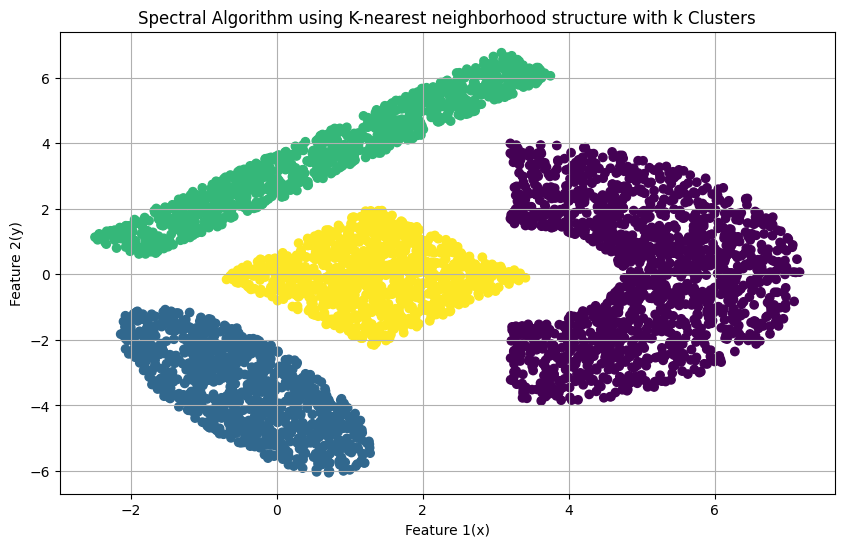

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(shapeddata_df)[:, 0], np.array(shapeddata_df)[:, 1], c=lab_knn, cmap='viridis', marker='o')
plt.title('Spectral Algorithm using K-nearest neighborhood structure with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.grid(True)
plt.show()

# As you can see above, the spectral algorithm is clustering the shaped data correctly for 50 nearest neighbour.

On Increasing the Number of clusters to 10

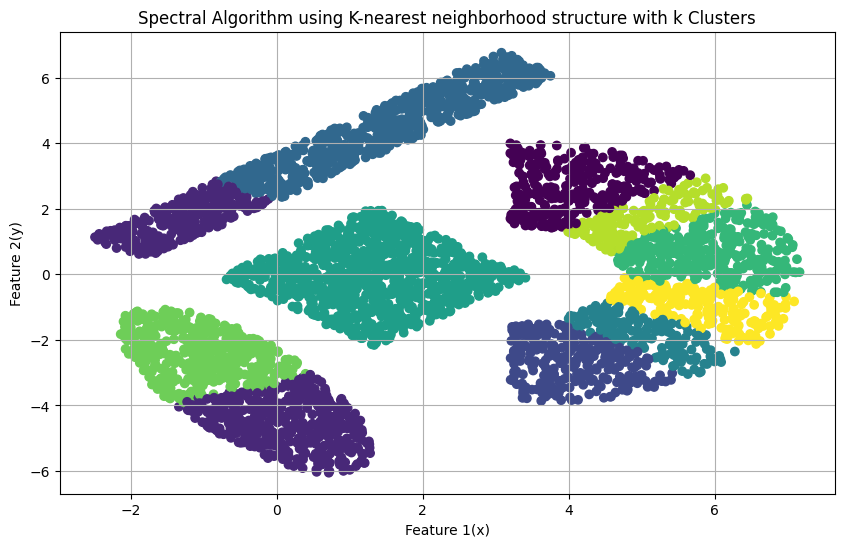

In [ ]:
lab_knn, k_cen_knn, best_dis_knn, adj_mat_knn, eigen_vec_knn= spectral_cluster(np.array(shapeddata_df),10,0,50)
plt.figure(figsize=(10, 6))
plt.scatter(np.array(shapeddata_df)[:, 0], np.array(shapeddata_df)[:, 1], c=lab_knn, cmap='viridis', marker='o')
plt.title('Spectral Algorithm using K-nearest neighborhood structure with k Clusters')
plt.xlabel('Feature 1(x)')
plt.ylabel('Feature 2(y)')
plt.grid(True)
plt.show()

Inference: <br>
On Incresing the K Neighbors we can see that the points are less properly clustered for small cluster value. But when we increase the cluster to big number, the algorithm clusters the points into perfect clusters and can be seen in the shaped data. From visual we can see there are 4 clusters, as I have given 10 clusters in the algorithm; it groups the 1 of the 4 clusters into segments totally adding to 10.